In [1]:
import pandas as pd
import numpy as np

df_data_1 = pd.read_csv(BankChurners.csv)

#Use BankChurners.csv file provided ...


In [2]:
# This part has Several Useful Functions and Import of Packages that we need in the Modeling That Follows
#
#

from matplotlib import pyplot as plt
from scipy.stats import *
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pylab as pl
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline 


def histRetained(dFrame, coL):
    C = dFrame[coL][dFrame['Attrition_Flag'] == 0]
    C = C.sample(n=100,random_state=1)
#    plt.hist(C,color = 'green',edgecolor='white')
    C.plot(kind='hist',figsize = (10, 8),color ='green',edgecolor='blue')
#
# plot and plt.hist give about the same results!!
#
    plt.xlabel(coL.upper())
    plt.ylabel('Frequency of Retained Customers')
    plt.title('Histogram of Retained Credit Card Customers Size n = 100')
    plt.show()
    return

def histLost(dFrame, coL):
    C = dFrame[coL][dFrame['Attrition_Flag'] == 1]
    C = C.sample(n=100,random_state=1)
#    plt.hist(C,color = 'red',edgecolor='black')
    C.plot(kind = 'hist', figsize = (10,8),color='red',edgecolor='black')
#
# plot and plt.hist give about the same results!!
#
    plt.xlabel(coL.upper())
    plt.ylabel('Frequency of Lost Customers')
    plt.title('Histogram of Lost Credit Card Customers Size n = 100')
    plt.show()
    return
    
    
def boxPlot(dFrame,coL):
    dFrame[coL].plot(kind='box', figsize=(8, 6), color='black', vert=True)
    plt.title('Box plot of ' + coL.upper() + ' Feature')
    plt.ylabel('Statistics')
    plt.show()
    return


def describeData(dFrame,coLs):
    for coL in coLs:
        print(dFrame[coL].describe())
    return
    
    
def stats(dFrame,coLs):
    for coL in coLs:
        print('Statistics for Feature ', coL)
        print('Max = %.4f' % dFrame[coL].max())
        print('Min = %.4f' %dFrame[coL].min())
        print('Mean = %.4f' % dFrame[coL].mean())
        print('Skewness = %.4f' % dFrame[coL].skew())
        print('Kurtosis = %.4f' % dFrame[coL].kurtosis())
        print('------------------------------------------------------\n')
    return
    

def removeOutliers(dFrame,coLs): #Here coLs is a LIST of columns from which OUTLIERS are to be removed ...
    for coL in coLs:
        dFrame = dFrame[np.abs(zscore(dFrame[coL])) < 3.0]
    return dFrame


def zscoreData(dFrame,coLs): # Here coLs is a LIST of columns (numeric) whose contents you wish to normalize (z)
    for aCol in coLs:
#        dFrame[aCol] = (dFrame[aCol]-dFrame[aCol].mean())/dFrame[aCol].std()
        dFrame[aCol] = zscore(dFrame[aCol])
    return dFrame
    


def cleanData(dFrame, Feature): # Here Feature is a Column Feature of dFrame based on which any missing or NULL data is removed.
    dFrame = dFrame.drop_duplicates()
    dFrame.dropna(axis = 0, inplace = True)
    missing_data = dFrame.isnull()
    dFrame = dFrame[dFrame[Feature] != missing_data[Feature]]
    return dFrame
    

def LabelEncoding(dFrame,coLs):  # Here coLs is a LIST whose contents you wish to Label Encode 0, 1, 2, 3, ... etc.
    labelEncoder = LabelEncoder()
    for aCol in coLs:
        dFrame[aCol] = labelEncoder.fit_transform(dFrame[aCol])
    dFrame = pd.DataFrame(dFrame)
    return dFrame


def dropColumns(dFrame,coLs): # Here coLs is a list of columns to be dropped and must be passed as a LIST ...
    dFrame.drop(coLs, axis = 1, inplace = True)
    return dFrame

    
def oneHotEncoding(dFrame,coLs): # Here coLs is a LIST whose contents you wish to ONE-HOT encode ...
    for col in coLs:
        dFrame_oneHot = pd.get_dummies(dFrame[col],prefix = col, prefix_sep=" ").astype('int64')
        for oneHotcol in dFrame_oneHot.columns:
            dFrame[oneHotcol] = dFrame_oneHot[oneHotcol]
        dropColumns(dFrame, [col])
    return dFrame
    
    
def getFeatureColumns(dFrame,labelColumn):
    return [x for x in dFrame.columns if x != labelColumn]


def corRelation(dFrame): #Needs all columns to be at least Label Encoded Numerically
    XDIM, YDIM = dFrame.corr().shape
    for i in range(XDIM):
        for j in range(i+1,YDIM):
            if (dFrame.corr().iloc[i,j] > 0.7):
                print('Feature1 = ', dFrame.columns[i], 'Feature2 = ',dFrame.columns[j], 'Correlation = %.4f' % dFrame.corr().iloc[i,j])
    return
    

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return


## PySpark Functions ...

def dropColumns(dFrame,coLs): # dFrame is a Pyspark Data Frame with coLs a list of columns we plan to drop from dFrame
    for x in coLs:
        dFrame = dFrame.drop(x)
    return dFrame

## Below is the Label Encoding Function ...

def LabelEncode(dFrame,coLs):  # Here dFrame is a Pyspark Data Frame and coLs is a List of columns for Label Encoding
    inputs = coLs
    outputs = []
    for input in inputs:
        outputs.append(input+'-Label')
    STINDEXER = STINDEX(inputCols = inputs, outputCols = outputs)
    MODEL = STINDEXER.fit(dFrame)
    dFrame = MODEL.transform(dFrame)
    for input in inputs:
        dFrame = dFrame.drop(input)
    return dFrame


## Below is a Function that Normalizes Numeric Column Data ...

def ZVALUES(dFrame, COLS):

# Here COLS is a List of Columns We Standardize to Mean = 0 and Standard Deviation = 1

# dFrame should be a Spark DataFrame
    
    from pyspark.sql.functions import stddev, mean, col, max, min
    for x in COLS:
        MEAN, STDEV = dFrame.select(mean(x), stddev(x)).first()
        dFrame = dFrame.withColumn("ZScore-"+x, (col(x) - MEAN)/STDEV)
        dFrame = dFrame.drop(x)
    return dFrame


## One Hot Encoding for dFrame

def oneHotEncoder(dFrame,inColumns,outColumns): # Here dFrame is a Spark Data Frame, inColumns and outColumns are Lists ...
    ENCODER = ONEHOT(inputCols = inColumns, outputCols = outColumns)
    MODEL = ENCODER.fit(dFrame)
    dFrame = MODEL.transform(dFrame)
    for col in inColumns:
        dFrame = dFrame.drop(col)
    return dFrame  

In [3]:
df1 = df_data_1

In [4]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('# <span style="color:green">'+string+'</span>'))


if ('sc' in locals() or 'sc' in globals()):
    printmd('<<<<<!!!!! It seems that you are running in a IBM Watson Studio Apache Spark Notebook. Please run it in an IBM Watson Studio Default Runtime (without Apache Spark) !!!!!>>>>>')
else:
    printmd("All is Fine -- Proceed!")

# <span style="color:green">All is Fine -- Proceed!</span>

In [5]:
!pip install pyspark==3.0.0

     |████████████████████████████████| 204.7 MB 63.5 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 56.1 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-3.0.0-py2.py3-none-any.whl size=205044182 sha256=8a849e58a8ae71e61ffde8cf47be863becbd04f064744e3d69c27ab3a0b06590
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/4e/c5/36/aef1bb711963a619063119cc032176106827a129c0be20e301
Successfully built pyspark


In [6]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
    printmd("All Libraries Imported OK ... Please Proceed")
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

# <span style="color:green">All Libraries Imported OK ... Please Proceed</span>

In [7]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [8]:
df1 = spark.createDataFrame(df1)

In [9]:
df1.count(), len(df1.columns)

(10127, 23)

## The plan: Clean Data, Drop Columns Not Needed, Take Out Outliers, Normalize, Label Encode, One Hot Encode (ETL Stuff..) Follow by Modeling ...

### Take Out Duplicates

In [10]:
df1 = df1.dropDuplicates()

In [11]:
df1 = df1.distinct()

### Take Out Null Values 

In [12]:
df1 = df1.na.drop()

In [13]:
df1.count()

10127

### Dropping Columns We Don't Need

In [14]:
colsToDrop = [df1.columns[0],df1.columns[-1],df1.columns[-2]]

In [15]:
df1 = dropColumns(df1, colsToDrop)

In [16]:
df1.columns

['Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [27]:
for coL in df1.columns:
    df1.groupBy(coL).count().show()

+-----------------+-----+
|   Attrition_Flag|count|
+-----------------+-----+
|Existing Customer| 8500|
|Attrited Customer| 1627|
+-----------------+-----+

+------------+-----+
|Customer_Age|count|
+------------+-----+
|          26|   78|
|          29|   56|
|          65|  101|
|          54|  307|
|          34|  146|
|          50|  452|
|          57|  223|
|          43|  473|
|          32|  106|
|          31|   91|
|          39|  333|
|          68|    2|
|          58|  157|
|          63|   65|
|          27|   32|
|          51|  398|
|          56|  262|
|          52|  376|
|          41|  379|
|          33|  127|
+------------+-----+
only showing top 20 rows

+------+-----+
|Gender|count|
+------+-----+
|     F| 5358|
|     M| 4769|
+------+-----+

+---------------+-----+
|Dependent_count|count|
+---------------+-----+
|              0|  904|
|              5|  424|
|              1| 1838|
|              3| 2732|
|              2| 2655|
|              4| 1574|
+-----

### Removing Leading and Trailing White Spaces from Column Header Names

In [17]:
Replace = lambda x : x.strip()

In [18]:
for coL in df1.columns:
    coL = Replace(coL)

In [17]:
df1.columns

['Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [86]:
#df1.createOrReplaceTempView('df1')

### Filtering Out Rows that Have Unknown Data or Missing Values or Null Values Etc.

In [19]:
colsToFilter = ['Education_Level','Income_Category','Marital_Status']

for coL in colsToFilter:
    df1 = df1.filter(df1[coL] != 'Unknown')

In [20]:
for coL in colsToFilter:
    df1.groupBy(coL).count().show()

+---------------+-----+
|Education_Level|count|
+---------------+-----+
|    High School| 1653|
|     Uneducated| 1204|
|  Post-Graduate|  431|
|      Doctorate|  358|
|       Graduate| 2591|
|        College|  844|
+---------------+-----+

+---------------+-----+
|Income_Category|count|
+---------------+-----+
|        $120K +|  572|
|    $60K - $80K| 1103|
|   $80K - $120K| 1202|
|    $40K - $60K| 1412|
| Less than $40K| 2792|
+---------------+-----+

+--------------+-----+
|Marital_Status|count|
+--------------+-----+
|       Married| 3564|
|      Divorced|  569|
|        Single| 2948|
+--------------+-----+



In [20]:
print("The Count = %d" % df1.count())

The Count = 7081


### Label Encoding or String Indexing Using Pyspark ML

In [21]:
from pyspark.ml.feature import StringIndexer as STINDEX

In [22]:
colsToIndex = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

df1 = LabelEncode(df1,colsToIndex)

In [27]:
df1.columns

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Card_Category-Label',
 'Gender-Label',
 'Income_Category-Label',
 'Marital_Status-Label',
 'Attrition_Flag-Label',
 'Education_Level-Label']

In [27]:
for coL in colsToIndex:
    df1.groupBy(coL+'-Label').count().show()

+--------------------+-----+
|Attrition_Flag-Label|count|
+--------------------+-----+
|                 0.0| 5968|
|                 1.0| 1113|
+--------------------+-----+

+------------+-----+
|Gender-Label|count|
+------------+-----+
|         0.0| 3706|
|         1.0| 3375|
+------------+-----+

+---------------------+-----+
|Education_Level-Label|count|
+---------------------+-----+
|                  0.0| 2591|
|                  1.0| 1653|
|                  4.0|  431|
|                  3.0|  844|
|                  2.0| 1204|
|                  5.0|  358|
+---------------------+-----+

+--------------------+-----+
|Marital_Status-Label|count|
+--------------------+-----+
|                 0.0| 3564|
|                 1.0| 2948|
|                 2.0|  569|
+--------------------+-----+

+---------------------+-----+
|Income_Category-Label|count|
+---------------------+-----+
|                  0.0| 2792|
|                  1.0| 1412|
|                  4.0|  572|
|            

### Here we will need to first Normalize over Mean and Standard Deviation for df2 and then Convert Back to Spark DF to take Out Outliers using FILTER command ...

In [23]:
from pyspark.sql.functions import stddev, mean, col, max, min, abs, skewness, kurtosis

In [26]:
print("STD = %.4f" % df1.select(stddev("Dependent_count")).first()[0])

STD = 1.2916


In [27]:
df1.columns

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Card_Category-Label',
 'Gender-Label',
 'Income_Category-Label',
 'Marital_Status-Label',
 'Attrition_Flag-Label',
 'Education_Level-Label']

In [24]:
colsToStandardize = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon', \
                     'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1', \
                     'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

In [25]:
df1 = ZVALUES(df1, colsToStandardize)

In [26]:
df1.columns

['Card_Category-Label',
 'Gender-Label',
 'Income_Category-Label',
 'Marital_Status-Label',
 'Attrition_Flag-Label',
 'Education_Level-Label',
 'ZScore-Customer_Age',
 'ZScore-Dependent_count',
 'ZScore-Months_on_book',
 'ZScore-Total_Relationship_Count',
 'ZScore-Months_Inactive_12_mon',
 'ZScore-Contacts_Count_12_mon',
 'ZScore-Credit_Limit',
 'ZScore-Total_Revolving_Bal',
 'ZScore-Avg_Open_To_Buy',
 'ZScore-Total_Amt_Chng_Q4_Q1',
 'ZScore-Total_Trans_Amt',
 'ZScore-Total_Trans_Ct',
 'ZScore-Total_Ct_Chng_Q4_Q1',
 'ZScore-Avg_Utilization_Ratio']

### Filter Out Outliers in the Above Normalized Columns with |z| > 3.0000

In [27]:
colsForOutliers = []

for coL in colsToStandardize:
    colsForOutliers.append("ZScore-"+coL)

for coL in colsForOutliers:
    print(coL)
#    df1 = df1.filter( (df1[coL] <= 3.0) & (df1[coL] >= -3))
    df1 = df1.filter(abs(df1[coL]) <= 3.0)

ZScore-Customer_Age
ZScore-Dependent_count
ZScore-Months_on_book
ZScore-Total_Relationship_Count
ZScore-Months_Inactive_12_mon
ZScore-Contacts_Count_12_mon
ZScore-Credit_Limit
ZScore-Total_Revolving_Bal
ZScore-Avg_Open_To_Buy
ZScore-Total_Amt_Chng_Q4_Q1
ZScore-Total_Trans_Amt
ZScore-Total_Trans_Ct
ZScore-Total_Ct_Chng_Q4_Q1
ZScore-Avg_Utilization_Ratio


In [28]:
df1.columns

['Card_Category-Label',
 'Gender-Label',
 'Income_Category-Label',
 'Marital_Status-Label',
 'Attrition_Flag-Label',
 'Education_Level-Label',
 'ZScore-Customer_Age',
 'ZScore-Dependent_count',
 'ZScore-Months_on_book',
 'ZScore-Total_Relationship_Count',
 'ZScore-Months_Inactive_12_mon',
 'ZScore-Contacts_Count_12_mon',
 'ZScore-Credit_Limit',
 'ZScore-Total_Revolving_Bal',
 'ZScore-Avg_Open_To_Buy',
 'ZScore-Total_Amt_Chng_Q4_Q1',
 'ZScore-Total_Trans_Amt',
 'ZScore-Total_Trans_Ct',
 'ZScore-Total_Ct_Chng_Q4_Q1',
 'ZScore-Avg_Utilization_Ratio']

In [29]:
df1.count()

6559

In [37]:
from pyspark.sql.functions import skewness, kurtosis, corr

In [38]:
for col in colsForOutliers:
    MAX, MIN, STDEV, SKEW, KURT = df1.select(max(col), min(col), stddev(col), skewness(col), kurtosis(col)).first()
    print("***********************************")
    print("Z Column = ", col)
    print("Max = %.4f" % MAX)
    print("Min = %.4f" % MIN)
    print("STDEV = %.4f" % STDEV)
    print("SKEWNESS = %.4f" % SKEW)
    print("KURTOSIS = %.4f" % KURT)
    print("***********************************\n")
    

***********************************
Z Column =  ZScore-Customer_Age
Max = 2.9414
Min = -2.5304
STDEV = 0.9949
SKEWNESS = -0.0382
KURTOSIS = -0.3415
***********************************

***********************************
Z Column =  ZScore-Dependent_count
Max = 2.0611
Min = -1.8099
STDEV = 0.9989
SKEWNESS = -0.0368
KURTOSIS = -0.6657
***********************************

***********************************
Z Column =  ZScore-Months_on_book
Max = 2.5015
Min = -2.8717
STDEV = 0.9977
SKEWNESS = -0.0752
KURTOSIS = 0.3104
***********************************

***********************************
Z Column =  ZScore-Total_Relationship_Count
Max = 1.4119
Min = -1.8255
STDEV = 0.9969
SKEWNESS = -0.1988
KURTOSIS = -0.9708
***********************************

***********************************
Z Column =  ZScore-Months_Inactive_12_mon
Max = 2.6705
Min = -2.3541
STDEV = 0.9315
SKEWNESS = 0.2062
KURTOSIS = -0.1276
***********************************

***********************************
Z Column =  ZS

In [35]:
from pyspark.sql.functions import corr, kurtosis, skewness

In [36]:
NUMBER_OF_FEATURES = len(df1.columns)

In [37]:
for i in range(6, NUMBER_OF_FEATURES):
    for j in range(i+1, NUMBER_OF_FEATURES):
        CORR = df1.select(corr(df1.columns[i],df1.columns[j])).first()[0]
#        print("The Columns are %s AND %s" % (df1.columns[i], df1.columns[j]))
        if float(CORR) > 0.7:
            print("Correlation Between %s and %s is %.4f" % (df1.columns[i],df1.columns[j],CORR))
    

Correlation Between ZScore-Customer_Age and ZScore-Months_on_book is 0.7914
Correlation Between ZScore-Credit_Limit and ZScore-Avg_Open_To_Buy is 0.9959
Correlation Between ZScore-Total_Trans_Amt and ZScore-Total_Trans_Ct is 0.7933


In [48]:
KURTOSIS = df1.select(kurtosis('ZScore-Customer_Age')).first()

In [49]:
print("The Kurtosis is %.4f" % KURTOSIS)

The Kurtosis is -0.3415


In [50]:
SKEWNESS = df1.select(skewness('ZScore-Credit_Limit')).first()

In [51]:
print("The Skewness is %.4f" % SKEWNESS)

The Skewness is 1.7544


### Now Let's Proceed with One Hot Encoding on the Gender Column ...

In [30]:
from pyspark.ml.feature import OneHotEncoder as ONEHOT

#from pyspark.ml.feature.OneHotEncoder(self, includeFirst=True, inputCol=None, outputCol=None)[source]¶

In [31]:
df1 = oneHotEncoder(df1,['Gender-Label'],['Hot-Gender-Label'])

In [32]:
df1.select(['Hot-Gender-Label']).show(10)

+----------------+
|Hot-Gender-Label|
+----------------+
|   (1,[0],[1.0])|
|   (1,[0],[1.0])|
|   (1,[0],[1.0])|
|   (1,[0],[1.0])|
|       (1,[],[])|
|   (1,[0],[1.0])|
|   (1,[0],[1.0])|
|   (1,[0],[1.0])|
|       (1,[],[])|
|       (1,[],[])|
+----------------+
only showing top 10 rows



In [33]:
df1.columns

['Card_Category-Label',
 'Income_Category-Label',
 'Marital_Status-Label',
 'Attrition_Flag-Label',
 'Education_Level-Label',
 'ZScore-Customer_Age',
 'ZScore-Dependent_count',
 'ZScore-Months_on_book',
 'ZScore-Total_Relationship_Count',
 'ZScore-Months_Inactive_12_mon',
 'ZScore-Contacts_Count_12_mon',
 'ZScore-Credit_Limit',
 'ZScore-Total_Revolving_Bal',
 'ZScore-Avg_Open_To_Buy',
 'ZScore-Total_Amt_Chng_Q4_Q1',
 'ZScore-Total_Trans_Amt',
 'ZScore-Total_Trans_Ct',
 'ZScore-Total_Ct_Chng_Q4_Q1',
 'ZScore-Avg_Utilization_Ratio',
 'Hot-Gender-Label']

### Extracting a Column as a List from Spark Data Frame

In [35]:
mm = df1.select("ZScore-Customer_Age").rdd.map(lambda x : x[0]).collect()

In [37]:
type(mm)

list

In [178]:
mmList = []
for i in range(len(mm)):
    mmList.append(mm[i][0])

#### Another Example of Extracting Column as List ...

In [95]:
vv = df1.select("Hot-Gender-Label").collect()

In [96]:
vvList = []
for i in range(len(vv)):
    vvList.append(vv[i][0])

### Looks like we're now ready for Keras DL Algorithms

In [34]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import ArrayType, DoubleType



In [35]:
def to_array(col):
    def to_array_(v):
        return v.toArray().tolist()
    return udf(to_array_, ArrayType(DoubleType()))(col)



In [50]:
for x in ['GC2[0]','GC2[1]']:
    df1 = df1.drop(x)

In [52]:
df1 = df1.withColumn("GC2", to_array(col("Hot-Gender-Label"))).select(df1.columns + [col("GC2")[i] for i in range(1)])

In [53]:
df1.columns

['Card_Category-Label',
 'Income_Category-Label',
 'Marital_Status-Label',
 'Attrition_Flag-Label',
 'Education_Level-Label',
 'ZScore-Customer_Age',
 'ZScore-Dependent_count',
 'ZScore-Months_on_book',
 'ZScore-Total_Relationship_Count',
 'ZScore-Months_Inactive_12_mon',
 'ZScore-Contacts_Count_12_mon',
 'ZScore-Credit_Limit',
 'ZScore-Total_Revolving_Bal',
 'ZScore-Avg_Open_To_Buy',
 'ZScore-Total_Amt_Chng_Q4_Q1',
 'ZScore-Total_Trans_Amt',
 'ZScore-Total_Trans_Ct',
 'ZScore-Total_Ct_Chng_Q4_Q1',
 'ZScore-Avg_Utilization_Ratio',
 'Hot-Gender-Label',
 'GC2[0]']

In [63]:
df1 = df1.drop('Hot-Gender-Label')

In [91]:
maxy = df1.select(max('Attrition_Flag-Label')).first()[0]

In [92]:
print(maxy)

1.0


In [64]:
df1.columns

['Card_Category-Label',
 'Income_Category-Label',
 'Marital_Status-Label',
 'Attrition_Flag-Label',
 'Education_Level-Label',
 'ZScore-Customer_Age',
 'ZScore-Dependent_count',
 'ZScore-Months_on_book',
 'ZScore-Total_Relationship_Count',
 'ZScore-Months_Inactive_12_mon',
 'ZScore-Contacts_Count_12_mon',
 'ZScore-Credit_Limit',
 'ZScore-Total_Revolving_Bal',
 'ZScore-Avg_Open_To_Buy',
 'ZScore-Total_Amt_Chng_Q4_Q1',
 'ZScore-Total_Trans_Amt',
 'ZScore-Total_Trans_Ct',
 'ZScore-Total_Ct_Chng_Q4_Q1',
 'ZScore-Avg_Utilization_Ratio',
 'GC2[0]']

In [93]:
df1Label = 'Attrition_Flag-Label'
df1Features = df1.columns

In [94]:
df1Features.remove(df1Label)

In [95]:
len(df1Features)

19

In [96]:
df1Features

['Card_Category-Label',
 'Income_Category-Label',
 'Marital_Status-Label',
 'Education_Level-Label',
 'ZScore-Customer_Age',
 'ZScore-Dependent_count',
 'ZScore-Months_on_book',
 'ZScore-Total_Relationship_Count',
 'ZScore-Months_Inactive_12_mon',
 'ZScore-Contacts_Count_12_mon',
 'ZScore-Credit_Limit',
 'ZScore-Total_Revolving_Bal',
 'ZScore-Avg_Open_To_Buy',
 'ZScore-Total_Amt_Chng_Q4_Q1',
 'ZScore-Total_Trans_Amt',
 'ZScore-Total_Trans_Ct',
 'ZScore-Total_Ct_Chng_Q4_Q1',
 'ZScore-Avg_Utilization_Ratio',
 'GC2[0]']

In [97]:
df1Train, df1Test = df1.randomSplit([0.8,0.2])

In [98]:
type(df1Train)

pyspark.sql.dataframe.DataFrame

In [99]:
type(df1Test)

pyspark.sql.dataframe.DataFrame

In [109]:
XTrain = np.array(df1Train.select(df1Features).rdd.map(lambda x : x[:][:]).collect())
YTrain = np.array(df1Train.select(df1Label).rdd.map(lambda x : x[:][0]).collect())
XTest = np.array(df1Test.select(df1Features).rdd.map(lambda x : x[:][:]).collect())
YTest = np.array(df1Test.select(df1Label).rdd.map(lambda x : x[:][0]).collect())

In [110]:
len(XTrain)

5255

In [111]:
len(XTrain[1])

19

In [112]:
len(XTest)

1304

In [126]:
len(XTest[1])

19

In [102]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.utils import to_categorical as TOCAT

#from tensorflow.keras.utils import probas_to_classes as PROB_TO_CLASS


In [129]:
y_train_CAT = TOCAT(YTrain)
y_test_CAT = TOCAT(YTest)

#y_train_CAT = YTrain
#y_test_CAT = YTest

In [130]:
DLModel = Sequential()

In [131]:
INPUTSHAPE = len(df1Features)

In [132]:
DLModel.add(Dense(units = 64, activation = 'relu', input_dim = INPUTSHAPE))
DLModel.add(Dropout(0.2))
DLModel.add(Dense(units =  64, activation = 'relu'))
DLModel.add(Dropout(0.2))
DLModel.add(Dense(units = 2, activation = 'sigmoid'))

In [133]:
# DLModel.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

DLModel.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['CategoricalAccuracy'])

# In the above y_train and y_test need to be categoried using ONE HOT ENCODING to allow use of Categorical Accuracy metric


In [134]:
DLModel.fit(XTrain, y_train_CAT, epochs = 10, batch_size = 151)

Train on 5255 samples
Epoch 1/10
5255/5255 [==============================] - 23s 4ms/sample - loss: 0.4889 - CategoricalAccuracy: 0.8070
Epoch 2/10
5255/5255 [==============================] - 23s 4ms/sample - loss: 0.3698 - CategoricalAccuracy: 0.8386
Epoch 3/10
5255/5255 [==============================] - 23s 4ms/sample - loss: 0.3261 - CategoricalAccuracy: 0.8643
Epoch 4/10
5255/5255 [==============================] - 24s 5ms/sample - loss: 0.2984 - CategoricalAccuracy: 0.8801
Epoch 5/10
5255/5255 [==============================] - 23s 4ms/sample - loss: 0.2822 - CategoricalAccuracy: 0.8896
Epoch 6/10
5255/5255 [==============================] - 23s 4ms/sample - loss: 0.2680 - CategoricalAccuracy: 0.8875
Epoch 7/10
5255/5255 [==============================] - 24s 4ms/sample - loss: 0.2616 - CategoricalAccuracy: 0.8944
Epoch 8/10
5255/5255 [==============================] - 23s 4ms/sample - loss: 0.2470 - CategoricalAccuracy: 0.8990
Epoch 9/10
5255/5255 [============================

In [135]:
## Here is the SUMMARY of the DL Keras Model

print("Here is the SUMMARY of the DLModel\n")

print(DLModel.summary())

Here is the SUMMARY of the DLModel

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                1280      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 130       
Total params: 5,570
Trainable params: 5,570
Non-trainable params: 0
_________________________________________________________________
None


In [136]:
loss_and_metrics = DLModel.evaluate(XTest, y_test_CAT, batch_size = 151)

1304/1304 [==============================] - 2s 1ms/sample - loss: 0.1986 - CategoricalAccuracy: 0.9218


In [137]:
Categories = DLModel.predict(XTest, batch_size = 151)

In [138]:
Categories.shape

(1304, 2)

In [139]:
yhat = Categories.argmax(axis = 1)

In [140]:
#from sklearn import svm
from sklearn.metrics import f1_score as F1,jaccard_score as JACCARD,accuracy_score as ACCURACY

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      1121
         1.0       0.76      0.64      0.70       183

    accuracy                           0.92      1304
   macro avg       0.85      0.80      0.83      1304
weighted avg       0.92      0.92      0.92      1304

Confusion matrix, without normalization
[[1085   36]
 [  66  117]]


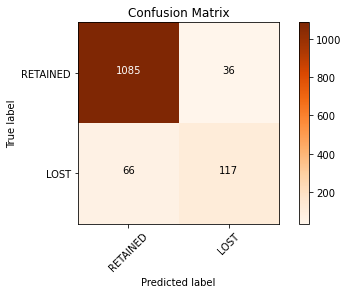

In [142]:
# Compute confusion matrix

# If you're using CategoricalAccuracy Metric then y_test_CAT = YTest etc.

y_test_CAT = YTest

cnf_matrix = confusion_matrix(y_test_CAT, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test_CAT, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['RETAINED','LOST'],normalize= False,  title='Confusion Matrix')

In [143]:
# Computer F1 Score and Jaccard Similarity Score and Accuracy Score

# If you're using CategoricalAccuracy Metric then y_test_CAT = YTest

y_test_CAT = YTest



print("F-1 Score = %.6f or %.2f%% Accurate" % (F1(y_test_CAT, yhat, average = 'weighted'),(100 * F1(y_test_CAT, yhat, average='weighted')))) 

print("Jaccard Score = %.6f or %.2f%% Accurate" % (JACCARD(y_test_CAT, yhat),(100 * JACCARD(y_test_CAT, yhat))))

print("The Accuracy Score is %.6f or %.2f%% Accurate" % (ACCURACY(y_test_CAT, yhat),(100 * ACCURACY(y_test_CAT, yhat))))

F-1 Score = 0.918804 or 91.88% Accurate
Jaccard Score = 0.534247 or 53.42% Accurate
The Accuracy Score is 0.921779 or 92.18% Accurate
